In [2]:
import os, shutil
original_dataset_dir = 'data/train'

# An epoch usually means one iteration over all of the training data. For instance if you have 20,000 images and a batch size of 100 then the epoch should contain 20,000 / 100 = 200 steps

In [16]:
base_dir = 'cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [17]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

In [18]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [20]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

In [22]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [23]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

In [24]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [13]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [16]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [17]:
names = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [18]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [19]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [30]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [24]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 1500 images belonging to 2 classes.


In [31]:
history = model.fit_generator(
train_generator,
steps_per_epoch=10,
epochs=10,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/10
10/10 [==============================] - 39s 4s/step - loss: 0.6896 - acc: 0.5350 - val_loss: 0.6870 - val_acc: 0.6290
Epoch 2/10
10/10 [==============================] - 32s 3s/step - loss: 0.6865 - acc: 0.6600 - val_loss: 0.6759 - val_acc: 0.6660
Epoch 3/10
10/10 [==============================] - 33s 3s/step - loss: 0.6863 - acc: 0.5450 - val_loss: 0.6736 - val_acc: 0.6660
Epoch 4/10
10/10 [==============================] - 31s 3s/step - loss: 0.6863 - acc: 0.5950 - val_loss: 0.6743 - val_acc: 0.6580
Epoch 5/10
10/10 [==============================] - 32s 3s/step - loss: 0.6860 - acc: 0.5600 - val_loss: 0.6633 - val_acc: 0.6640
Epoch 6/10
10/10 [==============================] - 32s 3s/step - loss: 0.6860 - acc: 0.5650 - val_loss: 0.6761 - val_acc: 0.6520
Epoch 7/10
10/10 [==============================] - 33s 3s/step - loss: 0.6817 - acc: 0.6300 - val_loss: 0.6732 - val_acc: 0.6650
Epoch 8/10
10/10 [==============================] - 34s 3s/step - loss: 0.6752 - acc: 0.60

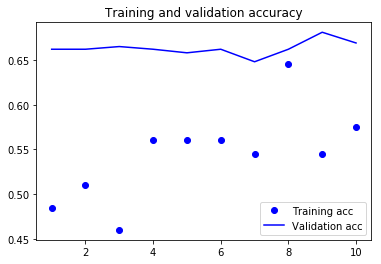

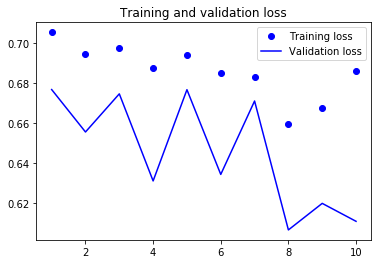

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# TUNNIG THE MODEL:


In [30]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training cat images:', len(os.listdir(train_dogs_dir)))
print('total training cat images:', len(os.listdir(test_cats_dir)))
print('total training cat images:', len(os.listdir(test_cats_dir)))

total training cat images: 1000
total training cat images: 1000
total training cat images: 500
total training cat images: 500


In [34]:
#function api style
from tensorflow.keras import layers
from tensorflow.keras import Model

img_input = layers.Input(shape=(150, 150, 3))
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)


x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)


x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)


x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)


In [35]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0     

# Compile the model

In [36]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# ImagedataGenerator

In [38]:
#ImagedataGenerator to prevent overfitting

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [39]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15
100/100 - 148s - loss: 0.8381 - acc: 0.5560 - val_loss: 0.6707 - val_acc: 0.6230
Epoch 2/15
100/100 - 49s - loss: 0.6637 - acc: 0.6570 - val_loss: 0.6564 - val_acc: 0.6140
Epoch 3/15
100/100 - 54s - loss: 0.5427 - acc: 0.7435 - val_loss: 0.6145 - val_acc: 0.6970
Epoch 4/15
100/100 - 48s - loss: 0.4540 - acc: 0.7950 - val_loss: 0.6486 - val_acc: 0.7160
Epoch 5/15
100/100 - 46s - loss: 0.3527 - acc: 0.8430 - val_loss: 0.8032 - val_acc: 0.6910
Epoch 6/15
100/100 - 45s - loss: 0.2490 - acc: 0.8905 - val_loss: 0.8048 - val_acc: 0.6830
Epoch 7/15
100/100 - 47s - loss: 0.1799 - acc: 0.9285 - val_loss: 1.0774 - val_acc: 0.6670
Epoch 8/15
100/100 - 52s - loss: 0.1322 - acc: 0.9550 - val_loss: 1.1857 - val_acc: 0.6870
Epoch 9/15
100/100 - 48s - loss: 0.0783 - acc: 0.9725 - val_loss: 1.2717 - val_acc: 0.6900
Epoch 10/15
100/100 - 47s - loss: 0.0802 - acc: 0.9810 - val_loss: 1.6495 - val_acc: 0.6910
Epoch 11/15
100/100 - 55s - loss: 0.0394 - acc: 0.9870 - val_loss: 1.9496 - val_acc: 0.6